In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import math
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import helper_functions as helper

# Step 1: Grab our images

In [2]:
def get_video_frames(video_file, intervals=[0]):
        clip = VideoFileClip(video_file)
        frames = []
        for i in intervals:
            frame = clip.get_frame(i)
            frames.append(frame)
        clip.reader.close()
        clip.audio.reader.close_proc()
        return frames

challenge_images = get_video_frames("challenge_video.mp4",[0])

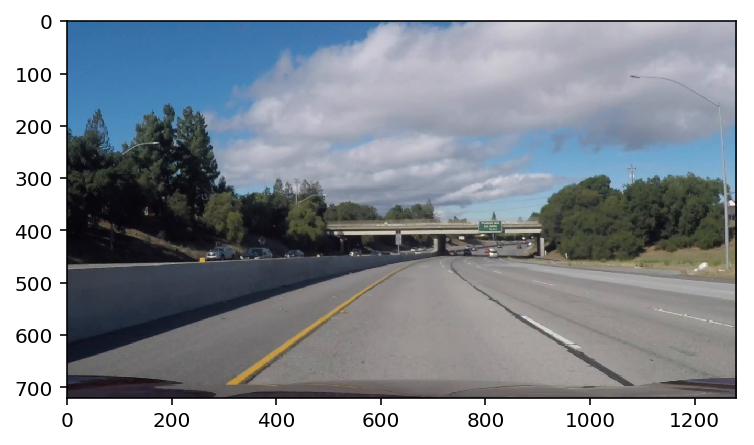

In [3]:
plt.imshow(challenge_images[0])

## Step 2: Camera calibration

In [4]:
calibration_images = helper.get_calibration_images()
camera_matrix, distortion_matrix = helper.calibrate_camera(calibration_images)

Calibrating camera..
Camera calibration done!


## Step 3: Undistort images

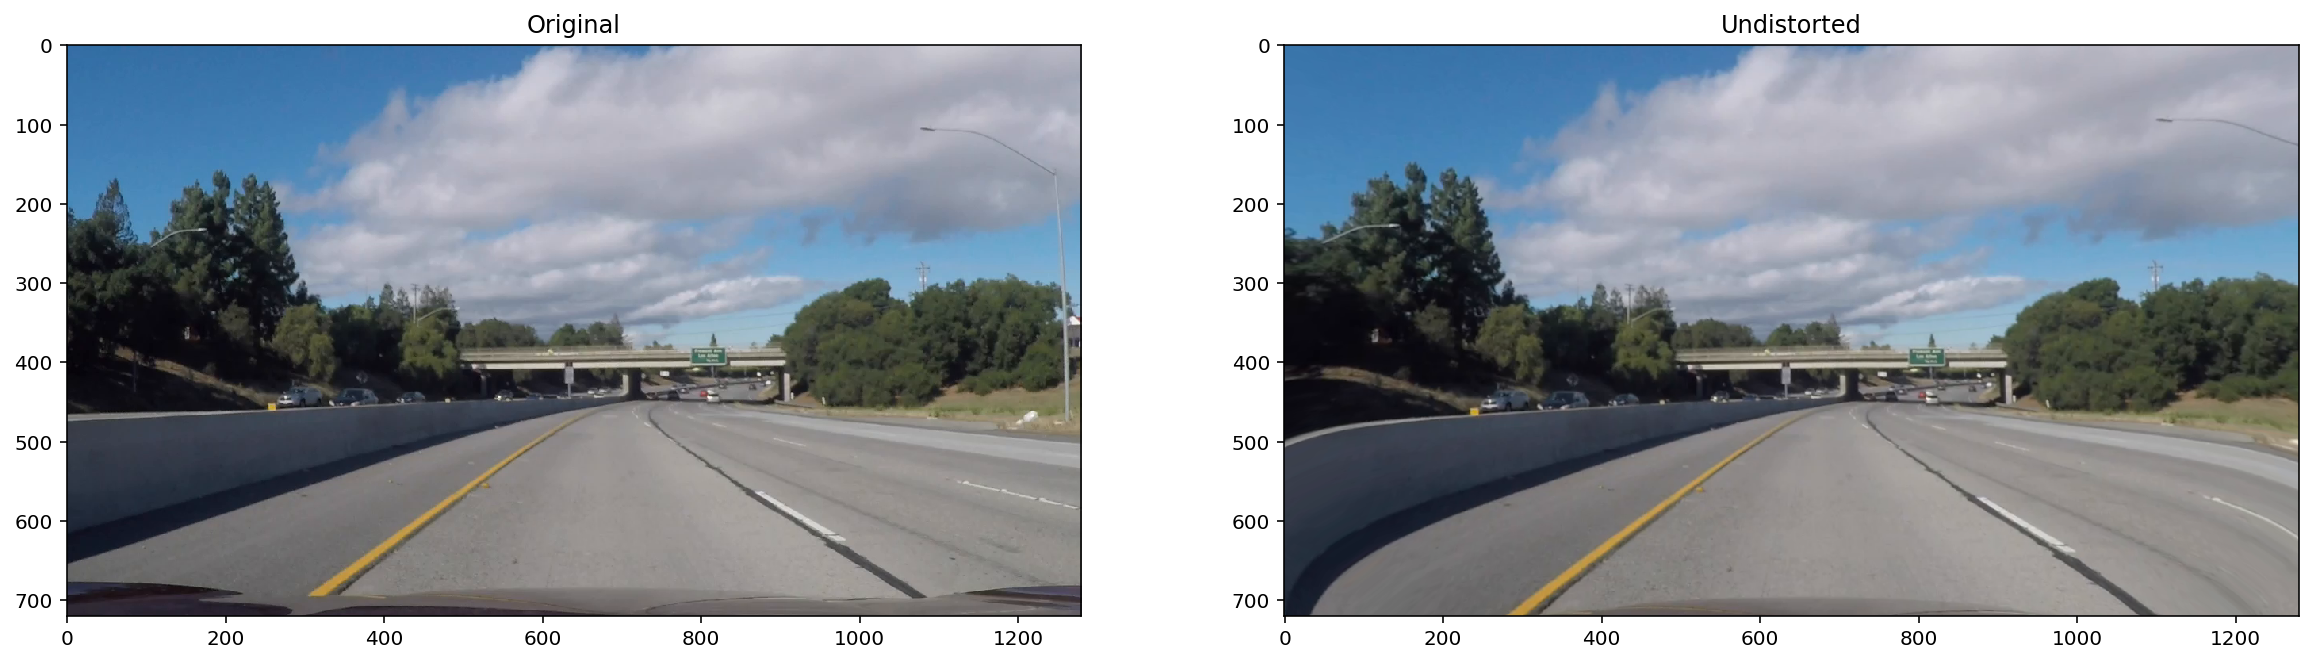

In [5]:
challenge_images_undistorted = []
for image in challenge_images:
    challenge_images_undistorted.append(helper.undistort_image(image,
                                                               camera_matrix, 
                                                               distortion_matrix))
# Show the images side by side
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title("Original")
ax1.imshow(challenge_images[0])
ax2.set_title("Undistorted")
ax2.imshow(challenge_images_undistorted[0])

In [43]:
def test(image):
    #hls = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    #hls = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb) # Take the 3rd channel
    #s_channel = hls[:,:,2]
    R = image[:,:,0]
    thresh_light = (200, 255)
    thresh_dark = (0, 55)
    binary = np.zeros_like(R)
    
    binary[(R > thresh[0]) & (R <= thresh[1])] = 1
    binary[(R > thresh[0]) & (R <= thresh[1])] = 1
    return s_channel

plt.imshow(test(challenge_images_undistorted[0]), cmap="gray")
plt.show()
plt.imshow(challenge_images_undistorted[0][:,:,0], cmap="gray")
plt.show()

TypeError: apply_thresholds() missing 1 required positional argument: 'images_undistorted'